In [1]:
load(file="0725-normalizedcounts_withref.Rda")

In [2]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [3]:
library(ggplot2)
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




In [4]:

## remove the x-axis text and tick
## plot.margin to adjust the white space between each plot.
## ... pass any arguments to VlnPlot in Seurat
modify_vlnplot<- function(obj, 
                          feature, 
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  p<- VlnPlot(obj, features = feature, pt.size = pt.size, ... )  + 
    xlab("") + ylab(feature) + ggtitle("") + 
    theme(legend.position = "none", 
          axis.text.x = element_blank(), 
          axis.ticks.x = element_blank(), 
          axis.title.y = element_text(size = rel(1), angle = 0), 
          axis.text.y = element_text(size = rel(1)), 
          plot.margin = plot.margin ) 
  return(p)
}

## extract the max value of the y axis
extract_max<- function(p){
  ymax<- max(ggplot_build(p)$layout$panel_scales_y[[1]]$range$range)
  return(ceiling(ymax))
}


## main function
StackedVlnPlot<- function(obj, features,
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  
  plot_list<- purrr::map(features, function(x) modify_vlnplot(obj = obj,feature = x, ...))
  
  # Add back x-axis title to bottom plot. patchwork is going to support this?
  plot_list[[length(plot_list)]]<- plot_list[[length(plot_list)]] +
    theme(axis.text.x=element_text(), axis.ticks.x = element_line())
  
  # change the y-axis tick to only max value 
  ymaxs<- purrr::map_dbl(plot_list, extract_max)
  plot_list<- purrr::map2(plot_list, ymaxs, function(x,y) x + 
                            scale_y_continuous(breaks = c(y)) + 
                            expand_limits(y = y))

  p<- patchwork::wrap_plots(plotlist = plot_list, ncol = 1)
  return(p)
}

In [5]:
normalized_counts

,1Ca,1N,2534465Ca,2534465N,2537821Ca,2537821N,3Ca,3N,N6,N7,⋯,TCGA.W5.AA2U.01A,TCGA.W5.AA2U.11A,TCGA.W5.AA30.01A,TCGA.W5.AA30.11A,TCGA.W5.AA31.01A,TCGA.W5.AA31.11A,TCGA.W5.AA34.01A,TCGA.W5.AA34.11A,TCGA.ZU.A8S4.01A,TCGA.ZU.A8S4.11A
A1BG,96.573339,6.107005e+03,67.050474,3330.92856,10.017859,5.482850e+03,341.664910,6376.926727,4.058523e+03,5.279644e+03,⋯,8.7497128,8.249479e+03,5.005496e+00,9.565688e+03,5.392732e+02,8.358989e+03,6.9056890,7.247501e+03,1.364069e+01,1.043196e+04
A1CF,797.203448,2.855599e+04,341.741127,29478.26310,2645.827982,1.899896e+04,3237.748579,25468.201568,1.521812e+04,1.896347e+04,⋯,2446.2354965,1.654695e+04,1.050244e+03,1.075224e+04,2.221595e+03,2.008721e+04,620.3610578,1.546621e+04,3.866610e+02,1.445537e+04
A2M,20316.379548,1.831228e+05,42931.769748,39789.29036,32404.435935,1.574640e+05,20257.852703,75720.270240,1.044109e+05,1.442421e+05,⋯,9793.2311878,1.861539e+05,1.257062e+04,2.796824e+05,2.521571e+04,1.911207e+05,2988.4368954,2.316569e+05,1.079241e+04,1.526202e+05
A2ML1,27.141527,9.572108e+00,25.955022,39.40134,13.357146,1.580831e+01,5.612565,19.115488,8.935541e+00,5.940193e+00,⋯,0.9210224,1.411615e+00,5.005496e+00,3.727376e+00,2.625113e+00,0.000000e+00,2.8773704,5.221542e+00,1.049284e+00,1.403843e+00
A3GALT2,3.787190,0.000000e+00,6.488756,0.00000,6.678573,2.634719e+00,2.104712,1.274366,8.935541e-01,7.128232e+00,⋯,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00,7.500322e-01,0.000000e+00,0.5754741,0.000000e+00,5.246419e-01,1.403843e+00
A4GALT,532.100163,1.100792e+02,151.404297,54.55570,169.190515,9.089781e+01,119.968582,133.808415,1.456493e+02,1.199919e+02,⋯,647.0182366,9.881307e+01,1.556254e+02,1.503375e+02,6.236518e+02,9.055180e+01,540.3701607,3.863941e+01,7.114144e+02,5.755757e+01
A4GNT,5.680785,9.572108e+00,0.000000,0.00000,6.678573,3.952079e+00,11.225131,1.274366,2.680662e+00,1.188039e+00,⋯,32.6962952,1.129292e+01,1.092108e+01,1.118213e+01,1.350058e+01,1.175997e+00,31.0756003,8.354467e+00,2.098567e+00,7.019216e+00
AAAS,515.057809,5.623614e+02,901.937024,366.73554,522.041785,3.438308e+02,512.146579,449.851146,3.681443e+02,4.954121e+02,⋯,956.4817632,1.123646e+03,9.446736e+02,1.161699e+03,1.007293e+03,1.227741e+03,1484.1476513,1.229151e+03,9.097290e+02,9.840941e+02
AACS,818.664190,3.158796e+02,2980.501724,206.09931,910.512112,2.068255e+02,595.633487,168.216293,1.688817e+02,3.457192e+02,⋯,782.4085295,1.962145e+02,1.229532e+03,2.894928e+02,7.579075e+02,3.916071e+02,1797.2055506,3.112039e+02,6.584255e+02,2.863840e+02
AADAC,554.192104,1.127953e+04,214.128934,6346.64640,320.571501,7.186196e+03,2521.444939,16162.782111,8.862269e+03,1.029792e+04,⋯,439.7881964,1.711301e+04,2.049978e+03,1.301724e+04,6.720289e+02,1.370743e+04,445.9924117,1.297031e+04,5.209694e+02,1.306978e+04


In [6]:
normal <- CreateSeuratObject(counts = normalized_counts, project = "normal",min.cells = 2)

In [7]:
normal@meta.data

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
1Ca,normal,19855061,16788
1N,normal,35133960,16338
2534465Ca,normal,22918075,16365
2534465N,normal,27776498,16137
2537821Ca,normal,20322316,16670
2537821N,normal,30114916,16590
3Ca,normal,20135939,16649
3N,normal,37148189,16352
N6,normal,30338371,16501


In [18]:
normal@meta.data$label<-'1'

In [19]:
normal@meta.data$label[c(2,4,6,8,9,10,11,12,18,19,20,21,22,23,30,32,34,36,38,40,42,44)]<-'normal'

In [20]:
normal@meta.data$label[c(1,3,5,7,13,14,15,16,17,24,25,26,27,28,29,31,33,35,37,39,41,43)]<-c('type2','type1','type2','type3','type3','type2','type3','type2','type2','type3','type2','type3','type3','type2','type1','type1','type1','type1','type1','type3','type1','type3')

In [21]:
table(normal@meta.data$label)


normal  type1  type2  type3 
    22      7      7      8 

In [22]:
normal@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,label
,<fct>,<dbl>,<int>,<chr>
1Ca,normal,19855061,16788,type2
1N,normal,35133960,16338,normal
2534465Ca,normal,22918075,16365,type1
2534465N,normal,27776498,16137,normal
2537821Ca,normal,20322316,16670,type2
2537821N,normal,30114916,16590,normal
3Ca,normal,20135939,16649,type3
3N,normal,37148189,16352,normal
N6,normal,30338371,16501,normal


In [23]:
options(repr.plot.height=6,repr.plot.width=7)

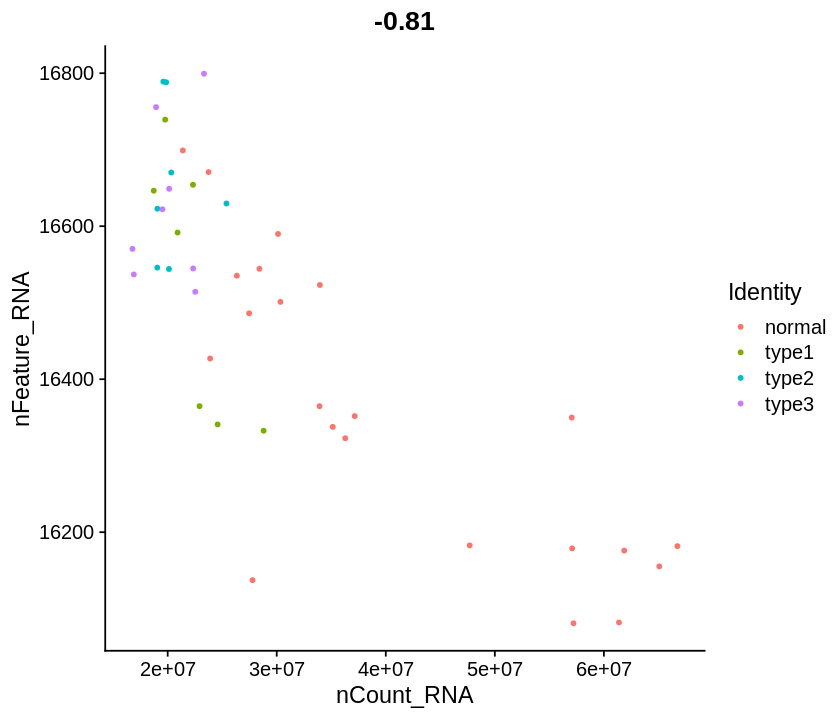

In [24]:
FeatureScatter(normal, feature1 = "nCount_RNA", feature2 = "nFeature_RNA",group.by='label')

In [25]:
Idents(object = normal) <- "label"

In [26]:
normal3.markers <- FindAllMarkers(normal, only.pos = TRUE)
top100<-normal3.markers %>% group_by(cluster) %>% top_n(n = 100,wt=avg_log2FC)

Calculating cluster type2

Calculating cluster normal

Calculating cluster type1

Calculating cluster type3



In [27]:
top100<-as.data.frame(top100)
write.csv(top100,file="0806-top100diffgene-normal.csv")

In [28]:
table(top100$cluster)


 type2 normal  type1  type3 
   184    454    187    100 

In [29]:
top100

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
3.361752e-05,Inf,1,0.811,0.5736493,type2,ST6GALNAC5
3.461970e-05,Inf,1,0.892,0.5907506,type2,COL11A1
3.475213e-05,Inf,1,0.919,0.5930104,type2,SLITRK4
3.481849e-05,Inf,1,0.946,0.5941428,type2,NOX4
3.841730e-05,Inf,1,0.676,0.6555529,type2,DRP2
4.005073e-05,Inf,1,1.000,0.6834257,type2,CLEC5A
4.599470e-05,Inf,1,1.000,0.7848535,type2,SLC2A5
4.599470e-05,Inf,1,1.000,0.7848535,type2,TMEM200A
5.276892e-05,Inf,1,1.000,0.9004489,type2,ADAMTS14


In [30]:
vm  <- as(as.matrix(normal@assays$RNA@data), 'sparseMatrix') 

In [31]:
vm<-as.data.frame(vm)

In [32]:
options(repr.plot.height=8,repr.plot.width=5)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



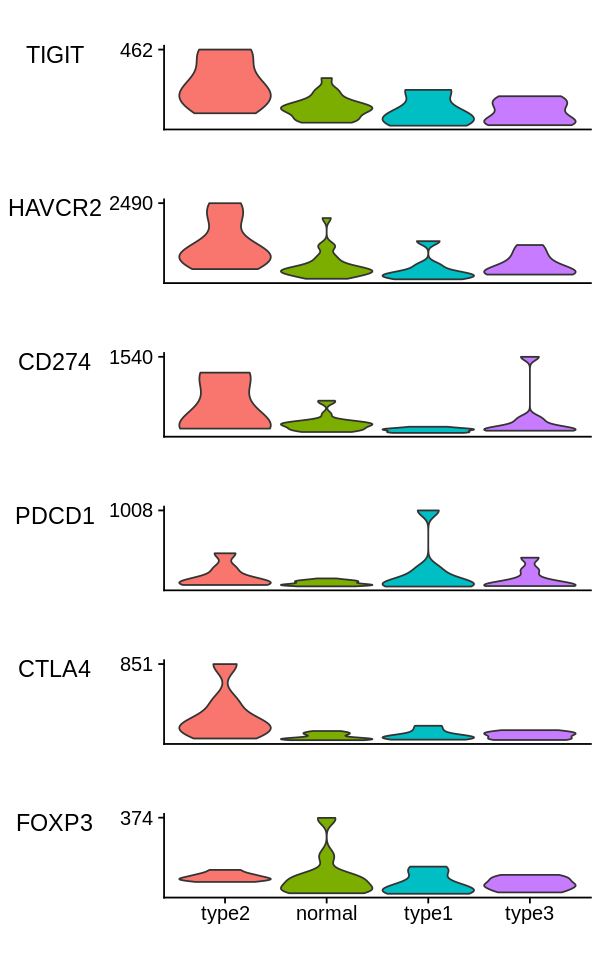

In [34]:
features<- c('TIGIT',"HAVCR2",'CD274','PDCD1','CTLA4','FOXP3')
StackedVlnPlot(obj =normal, features = features)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



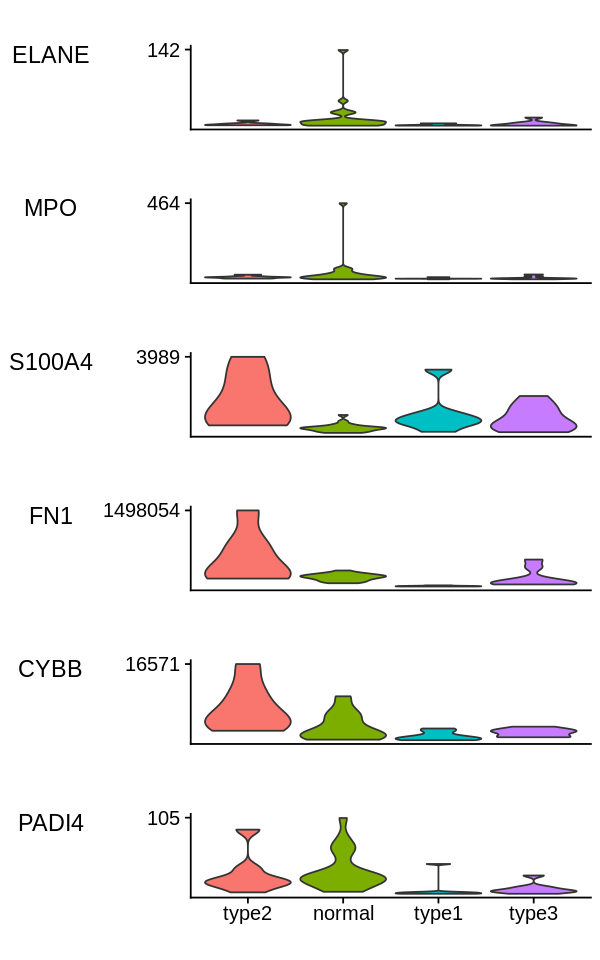

In [35]:
features<- c('ELANE','MPO','S100A4','FN1','CYBB','PADI4')
StackedVlnPlot(obj =normal, features = features)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



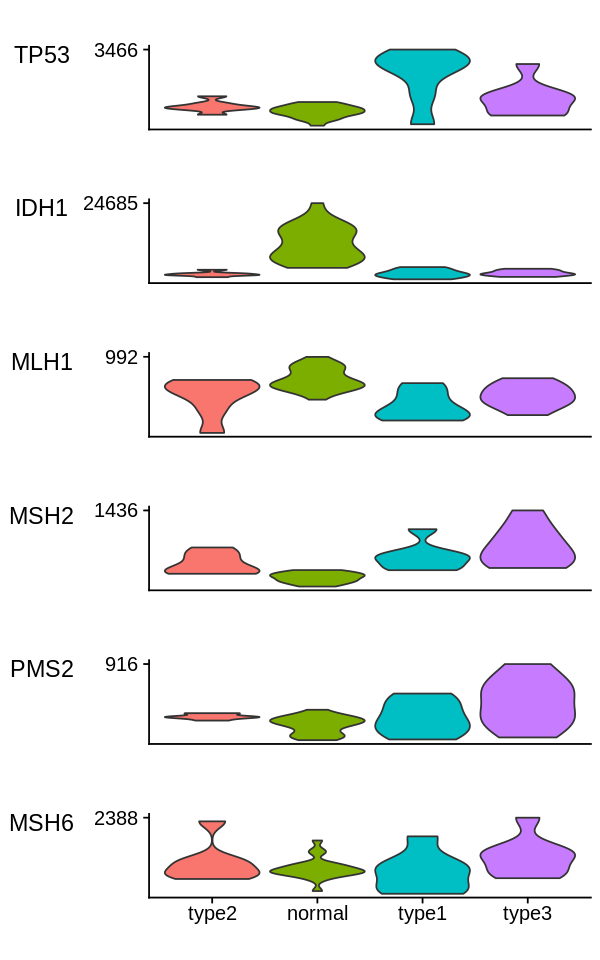

In [36]:
features<- c('TP53','IDH1',"MLH1",'MSH2','PMS2','MSH6')
StackedVlnPlot(obj =normal, features = features)

In [37]:
rownames(normalized_counts)[grep('FCGR',rownames(normalized_counts))]

[1] "FCGR1A" "FCGR1B" "FCGR2A" "FCGR2B" "FCGR3A" "FCGR3B" "FCGRT"

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



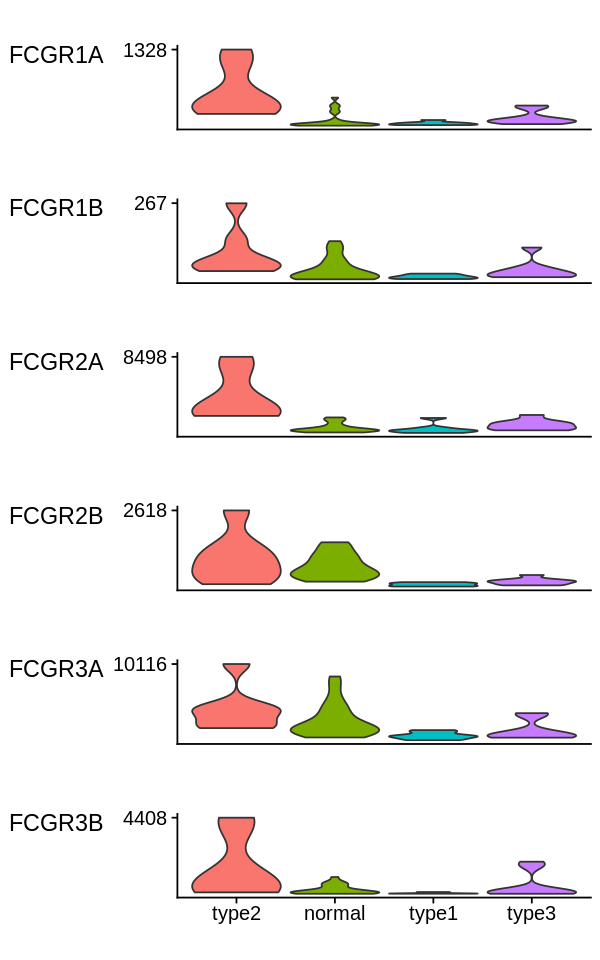

In [38]:
features<- c('FCGR1A',"FCGR1B",'FCGR2A','FCGR2B','FCGR3A','FCGR3B')
StackedVlnPlot(obj =normal, features = features)

In [39]:
rownames(normalized_counts)[grep('FGFR',rownames(normalized_counts))]

[1] "FGFR1"    "FGFR1OP"  "FGFR1OP2" "FGFR2"    "FGFR3"    "FGFR4"    "FGFRL1"

In [40]:
features<-rownames(normalized_counts)[grep('FGFR',rownames(normalized_counts))]

In [41]:
features<-features[1:6]

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



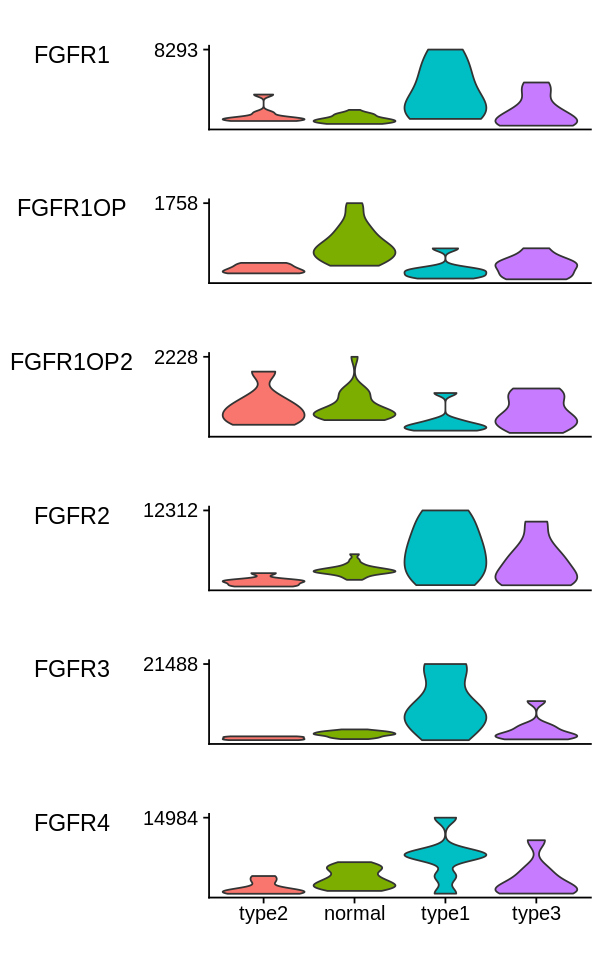

In [42]:
StackedVlnPlot(obj =normal, features = features)

In [61]:
options(repr.plot.height=3,repr.plot.width=6)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



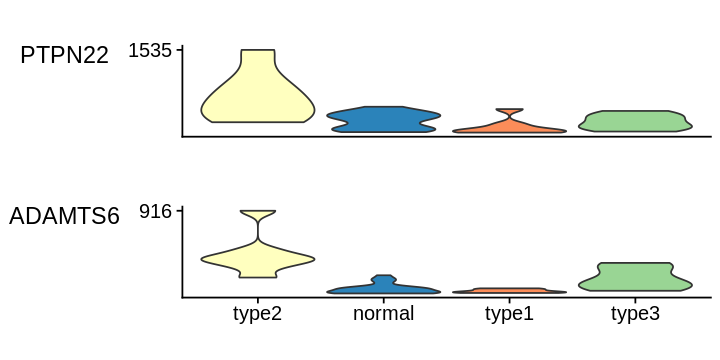

In [63]:
StackedVlnPlot(obj =normal, features = c('PTPN22','ADAMTS6'),cols=c('#FFFFBF','#2B83BA','#FC8D59','#99D594'))
ggsave('PTPN22ADAMTS6.pdf',height=3,width=5)